# MTH 337: Week 9

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Euler's Method

#### Define a function which returns the time derivative of the state

- The planet state is a 1d array with 4 elements: x, y, vx, vy.
- The value returned is a 1d array containing the time derivative of each element.

In [16]:
def dP_dt(P, t):
    G = 1.0
    M = 1.0
    x, y, vx, vy = P
    r3 = np.hypot(x, y)**3
    ax = -G*M*x/r3
    ay = -G*M*y/r3
    return np.array([vx, vy, ax, ay])

#### Define a function which uses Euler's Method to calculate successive states

- The result is a 2d array of shape (steps, 4).
- The rows contain the planet state at time t = 0, t = h, t = 2h etc. 

In [3]:
def euler_path(tmax, h, P0):
    steps = int(tmax/h)
    path = np.empty((steps+1, 4))
    P = np.copy(P0)
    path[0] = P
    for i in range(steps):
        P += h*dP_dt(P, i*h)
        path[i+1] = P
    return path

In [4]:
P0 = np.array([1., 0., 0., 1.])
print(euler_path(1, .1, P0))

[[ 1.          0.          0.          1.        ]
 [ 1.          0.1        -0.1         1.        ]
 [ 0.99        0.2        -0.19851853  0.99014815]
 [ 0.97014815  0.29901481 -0.29460696  0.97073634]
 [ 0.94068745  0.39608845 -0.38733361  0.94215654]
 [ 0.90195409  0.4903041  -0.47580075  0.90490632]
 [ 0.85437402  0.58079474 -0.55916376  0.85959002]
 [ 0.79845764  0.66675374 -0.63665133  0.80691476]
 [ 0.73479251  0.74744521 -0.7075852   0.74768128]
 [ 0.66403399  0.82221334 -0.77139813  0.68276953]
 [ 0.58689417  0.89049029 -0.8276484   0.6131199 ]]


#### Slice out the x and y coordinates, and plot the path of the planet

In [5]:
def plot_euler(tmax, h, P0):
    path = euler_path(tmax, h, P0)
    plt.plot(path[:,0], path[:,1])
    plt.axis('equal')
    plt.plot(0, 0, 'yo', ms=10)

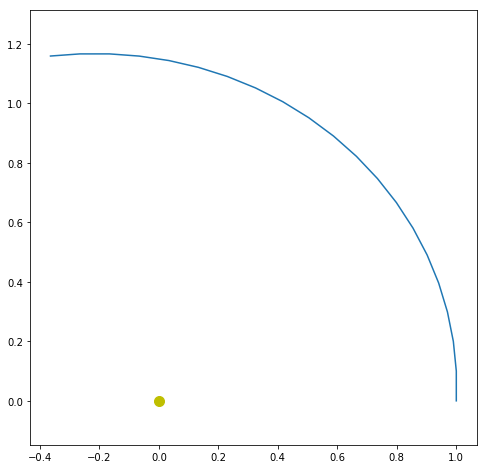

In [6]:
plt.figure(figsize=(8,8))
P0 = np.array([1., 0., 0., 1.])
plot_euler(2, .1, P0)

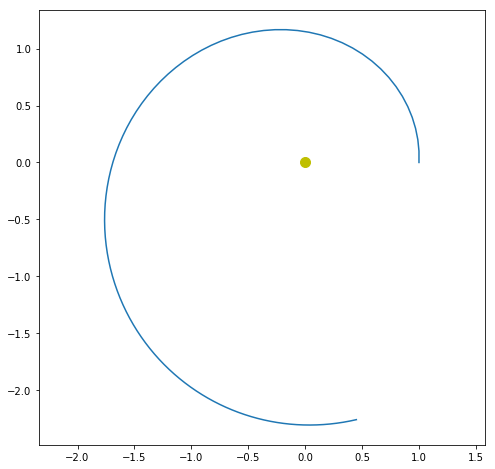

In [7]:
plt.figure(figsize=(8,8))
P0 = np.array([1., 0., 0., 1.])
plot_euler(10, .1, P0)

### Errors in Euler's Method - the planet is spiralling out from the sun

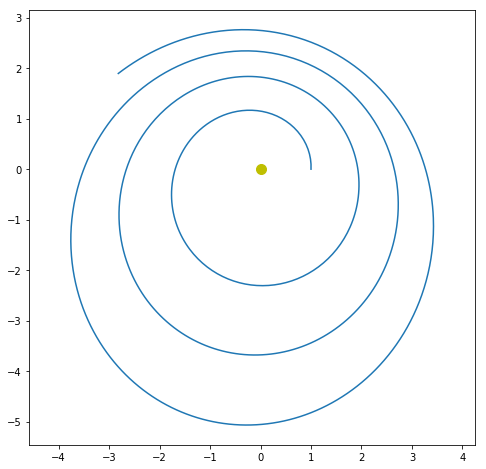

In [8]:
plt.figure(figsize=(8,8))
P0 = np.array([1., 0., 0., 1.])
plot_euler(100, .1, P0)

#### Reducing the step size h reduces, but doesn't eliminate the errors.

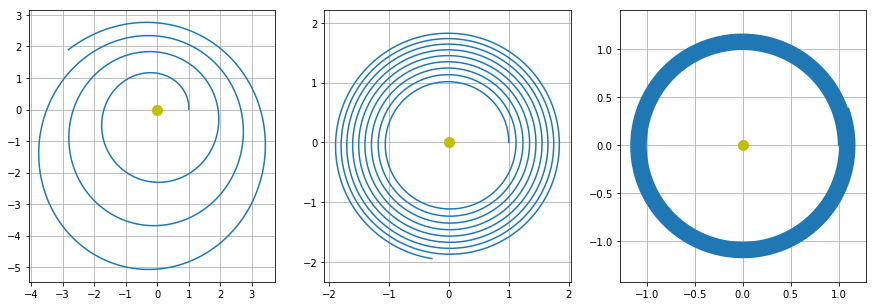

In [9]:
P0 = np.array([1., 0., 0., 1.])
plt.figure(figsize=(15, 5))
for i, h in enumerate([.1, .01, .001]):
    plt.subplot(1, 3, i+1)
    plot_euler(100, h, P0)
    plt.grid()

### Heun's Method

In [17]:
def calculate_path(tmax, h, P0):
    steps = int(tmax/h)
    path = np.empty((steps+1, 4))
    P = np.copy(P0)
    path[0] = P
    for i in range(steps):
        F1 = h*dP_dt(P, i*h)
        F2 = h*dP_dt(P+F1, (i+1)*h)
        P += (F1 + F2)/2
        path[i+1] = P
    return path

In [18]:
def plot_path(tmax, h, P0):
    path = calculate_path(tmax, h, P0)
    plt.plot(path[:,0], path[:,1])
    plt.axis('equal')
    plt.plot(0, 0, 'yo', ms=10)

#### Using Heun's Method, the errors are significantly reduced compared to Euler's Method.

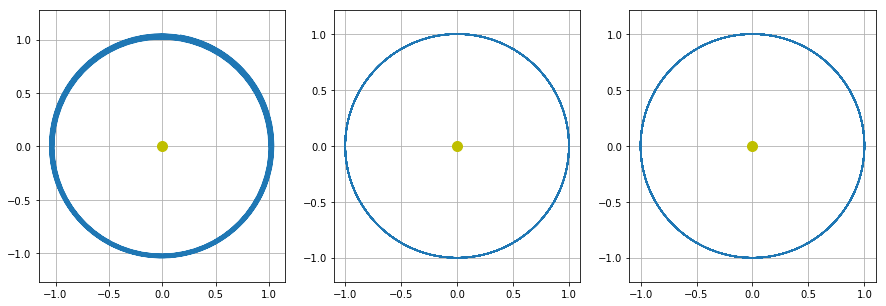

In [14]:
P0 = np.array([1., 0., 0., 1.])
plt.figure(figsize=(15, 5))
for i, h in enumerate([.1, .01, .001]):
    plt.subplot(1, 3, i+1)
    plot_path(100, h, P0)
    plt.grid()

### Use "enumerate" to keep track of positions when iterating over a sequence

In [15]:
for i, char in enumerate('abc'):
    print(i, char)

0 a
1 b
2 c


$$\begin{bmatrix} 1 & 2 \\ 3 & 4 \end{bmatrix}$$

### More on "meshgrid"

In [2]:
def distance(x, y):
    return np.sqrt(x**2 + y**2)

In [3]:
print(distance(3, 4))

5.0


In [4]:
npts = 5
x = np.linspace(-1, 1, npts)
y = np.linspace(-1, 1, npts)
print(x)
print(y)
X, Y = np.meshgrid(x, y)
print(X)
print(Y)

[-1.  -0.5  0.   0.5  1. ]
[-1.  -0.5  0.   0.5  1. ]
[[-1.  -0.5  0.   0.5  1. ]
 [-1.  -0.5  0.   0.5  1. ]
 [-1.  -0.5  0.   0.5  1. ]
 [-1.  -0.5  0.   0.5  1. ]
 [-1.  -0.5  0.   0.5  1. ]]
[[-1.  -1.  -1.  -1.  -1. ]
 [-0.5 -0.5 -0.5 -0.5 -0.5]
 [ 0.   0.   0.   0.   0. ]
 [ 0.5  0.5  0.5  0.5  0.5]
 [ 1.   1.   1.   1.   1. ]]


In [5]:
Z = distance(X, Y)
print(Z)

[[ 1.41421356  1.11803399  1.          1.11803399  1.41421356]
 [ 1.11803399  0.70710678  0.5         0.70710678  1.11803399]
 [ 1.          0.5         0.          0.5         1.        ]
 [ 1.11803399  0.70710678  0.5         0.70710678  1.11803399]
 [ 1.41421356  1.11803399  1.          1.11803399  1.41421356]]


### Contours plots

- **contour**(x, y, z) generates a contour plot of z = f(x, y) over a 2d grid.
- **contourf** fills the areas between the contours.
- **colorbar** shows which values the level curves refer to.

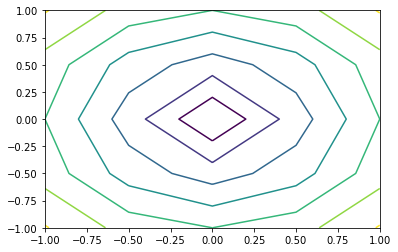

In [6]:
plt.contour(x, y, Z)

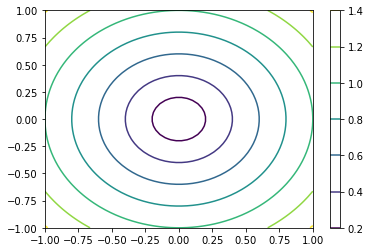

In [8]:
npts = 50
x = np.linspace(-1, 1, npts)
y = np.linspace(-1, 1, npts)
X, Y = np.meshgrid(x, y)
Z = distance(X, Y)
plt.contour(x, y, Z)
plt.colorbar()

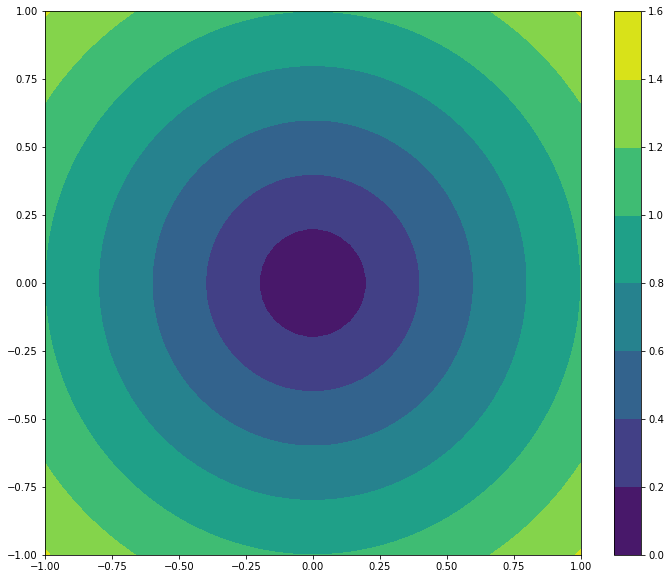

In [10]:
npts = 50
x = np.linspace(-1, 1, npts)
y = np.linspace(-1, 1, npts)
X, Y = np.meshgrid(x, y)
Z = distance(X, Y)
plt.figure(figsize=(12, 10))
plt.contourf(x, y, Z)
plt.colorbar()

#### Use the "cmap=" option to change the colormap.

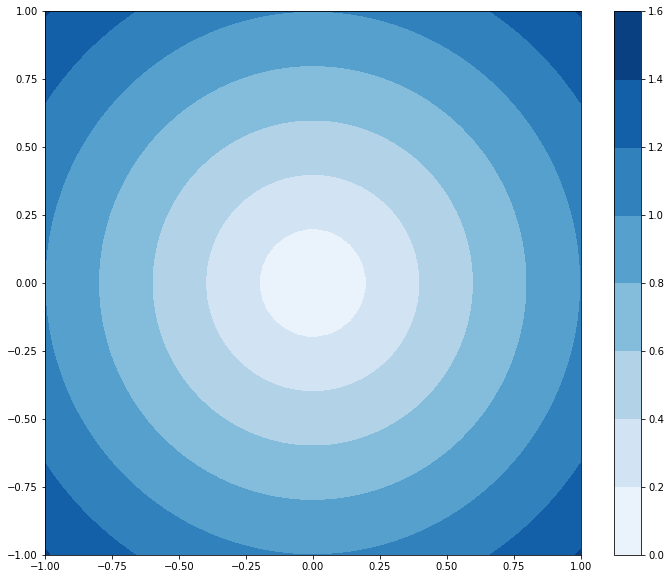

In [13]:
npts = 50
x = np.linspace(-1, 1, npts)
y = np.linspace(-1, 1, npts)
X, Y = np.meshgrid(x, y)
Z = distance(X, Y)
plt.figure(figsize=(12, 10))
plt.contourf(x, y, Z, cmap='Blues')
plt.colorbar()

#### Turn off the frame using the "frameon=False" option.

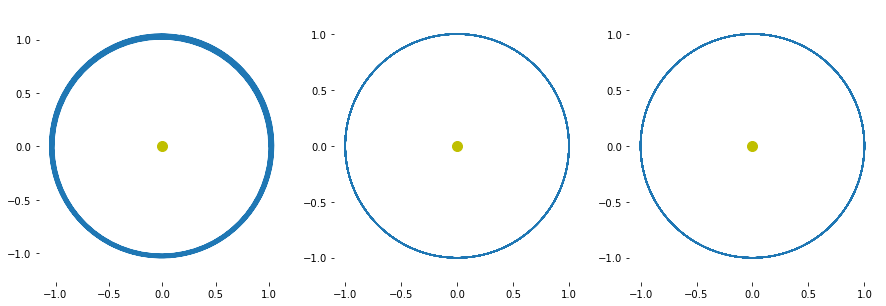

In [20]:
P0 = np.array([1., 0., 0., 1.])
plt.figure(figsize=(15, 5))
for i, h in enumerate([.1, .01, .001]):
    plt.subplot(1, 3, i+1, frameon=False)
    plot_path(100, h, P0)
    #plt.grid()

#### Use "subplot" to explore how the behavior of a system depends on the parameters.

- Maximize the "data-ink" ratio by turning off the frame and axis ticks.

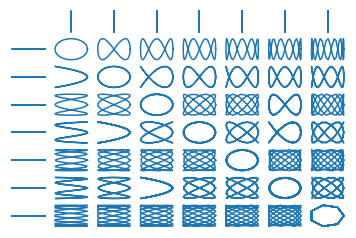

In [21]:
t = np.linspace(0, 2*np.pi)
nrows = 8
ncols = 8
nplot = 1
for col in range(ncols):
    for row in range(nrows):
        plt.subplot(nrows, ncols, nplot, frameon=False)
        plt.plot(np.cos(col*t), np.sin(row*t))
        plt.xticks([])
        plt.yticks([])
        nplot += 1